# K-means
牧师——村民模型：
- 有四个牧师去郊区布道，一开始牧师们随意选了几个布道点，并且把这几个布道点的情况公告给了郊区所有的村民，于是每个村民到离自己家最近的布道点去听课。
- 听课之后，大家觉得距离太远了，于是每个牧师统计了一下自己的课上所有的村民的地址，搬到了所有地址的中心地带，并且在海报上更新了自己的布道点的位置。
- 牧师每一次移动不可能离所有人都更近，有的人发现A牧师移动以后自己还不如去B牧师处听课更近，于是每个村民又去了离自己最近的布道点……
- 就这样，牧师每个礼拜更新自己的位置，村民根据自己的情况选择布道点，最终稳定了下来。

伪代码：
```C
获取数据 n 个 m 维的数据
随机生成 K 个 m 维的点
while(t)
    for(int i=0;i < n;i++)
        for(int j=0;j < k;j++)
            计算点 i 到类 j 的距离
    for(int i=0;i < k;i++)
        1. 找出所有属于自己这一类的所有数据点
        2. 把自己的坐标修改为这些数据点的中心点坐标
end
```

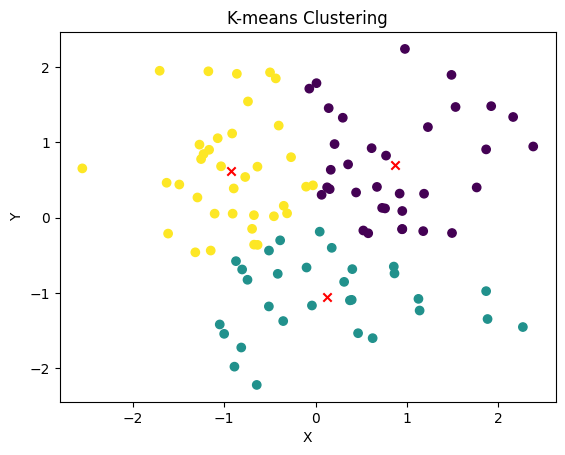

In [2]:
# 导入所需的库
import numpy as np
import matplotlib.pyplot as plt

# 生成随机数据
np.random.seed(0)
X = np.random.randn(100, 2)

# 定义k-means函数
def k_means(data, k, max_iterations=100):
    # 随机初始化k个聚类中心
    centroids = data[np.random.choice(range(len(data)), k, replace=False)]
    
    for _ in range(max_iterations):
        # 将每个数据点分配到最近的聚类中心
        labels = np.argmin(np.linalg.norm(data[:, np.newaxis] - centroids, axis=-1), axis=-1)
        
        # 更新聚类中心
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        
        # 检查是否收敛
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return labels, centroids

# 调用k-means函数
labels, centroids = k_means(X, k=3)

# 可视化结果
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-means Clustering')
plt.show()
